In [ ]:
import pandas as pd
import numpy as np
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
yeast = fetch_ucirepo(id=110)

# data (as pandas dataframes)
X = yeast.data.features
y = yeast.data.targets

# metadata
print(yeast.metadata)

# variable information
print(yeast.variables)


{'uci_id': 110, 'name': 'Yeast', 'repository_url': 'https://archive.ics.uci.edu/dataset/110/yeast', 'data_url': 'https://archive.ics.uci.edu/static/public/110/data.csv', 'abstract': 'Predicting the Cellular Localization Sites of Proteins', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1484, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['localization_site'], 'index_col': ['Sequence_Name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Sat Oct 28 2023', 'dataset_doi': '10.24432/C5KG68', 'creators': ['Kenta Nakai'], 'intro_paper': None, 'additional_info': {'summary': 'Predicted Attribute: Localization site of protein. ( non-numeric ).\r\n\r\nThe references below describe a predecessor to this dataset and its development. They also give results (not cross-validated) for classification by a rule-based expert system with that version of th

In [ ]:
X.shape

(1484, 8)

In [ ]:
y.shape

(1484, 1)

In [ ]:
X

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39


In [ ]:
#LABELENCODER
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[6 6 6 ... 4 7 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y

array([6, 6, 6, ..., 4, 7, 0])

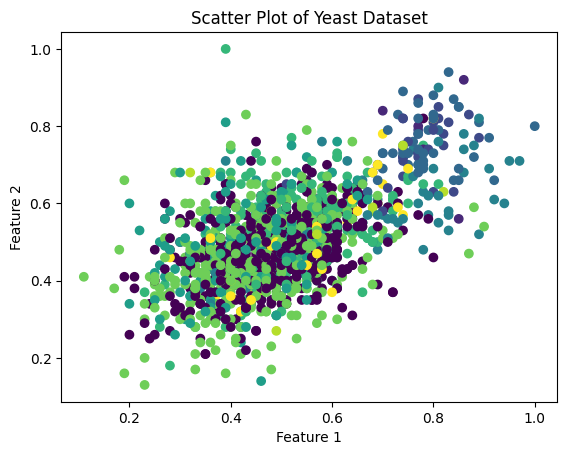

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Yeast Dataset')
plt.show()


In [ ]:
X.isnull().sum()

mcg    0
gvh    0
alm    0
mit    0
erl    0
pox    0
vac    0
nuc    0
dtype: int64

In [ ]:
from scipy.stats import pearsonr
corr = pearsonr(X['mcg'],X['gvh'])
print(corr)

PearsonRResult(statistic=0.581631419534367, pvalue=4.607911586259483e-135)


In [ ]:
X.corr()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
mcg,1.000000,0.581631,-0.163951,0.158175,0.064922,0.005597,0.075043,-0.124540
gvh,0.581631,1.000000,-0.271800,0.140314,0.060823,0.000392,0.088759,-0.102984
alm,-0.163951,-0.271800,1.000000,0.059668,-0.008083,0.009378,-0.185805,-0.022043
mit,0.158175,0.140314,0.059668,1.000000,-0.005931,-0.009040,-0.103591,-0.054797
erl,0.064922,0.060823,-0.008083,-0.005931,1.000000,-0.009674,0.043627,0.002829
pox,0.005597,0.000392,0.009378,-0.009040,-0.009674,1.000000,0.020900,-0.035659
vac,0.075043,0.088759,-0.185805,-0.103591,0.043627,0.020900,1.000000,0.089690
nuc,-0.124540,-0.102984,-0.022043,-0.054797,0.002829,-0.035659,0.089690,1.000000


In [ ]:
# fe_na='mcg'
# fe_data=X[fe_na].copy()
# fe_data1=fe_data.fillna(fe_data.mean())
# Q1 = fe_data1.quantile(0.25)
# Q3 = fe_data1.quantile(0.75)
# IQR = Q3 - Q1
# low_fence=Q1-1.5*IQR
# high_fence=Q3+1.5*IQR
# outliers = fe_data1[(fe_data1 < low_fence) | (fe_data1 > high_fence)]

In [ ]:
def remove_all_outliers(df_no_outliers,y):
    for col in df_no_outliers.select_dtypes(include=np.number).columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        low_fence = Q1 - 1.5 * IQR
        high_fence = Q3 + 1.5 * IQR
        mask = ~((df_no_outliers[col] < low_fence) | (df_no_outliers[col] > high_fence))
        df_no_outliers = df_no_outliers[mask]
        y = y[mask]
    return df_no_outliers,y
X_no_outliers,y_no_outliers = remove_all_outliers(X,y)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Bagging with Decision Tree
bagging_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
bagging_svm = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#Boosting
adaboost_dt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=0)
gb_dt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
# Voting
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
voting_clf = VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000))],voting='soft')
# Stacking
from sklearn.ensemble import StackingClassifier
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression(max_iter=1000))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())

In [ ]:
pred=X_no_outliers
tar=y_no_outliers
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
classifiers = [bagging_dt, bagging_svm, adaboost_dt, gb_dt, voting_clf, stacking_clf]
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=False)
average_accuracies = []
for clf in classifiers:
    scores = cross_val_score(clf, pred, tar, cv=kf)
    average_accuracy = np.mean(scores)
    average_accuracies.append(average_accuracy)
for i, clf in enumerate(classifiers):
    print(f"{clf.__class__.__name__} Average Accuracy: {average_accuracies[i]}")
overall_average_accuracy = np.mean(average_accuracies)
print(f"Overall Average Accuracy: {overall_average_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

BaggingClassifier Average Accuracy: 0.528257722007722
BaggingClassifier Average Accuracy: 0.557746138996139
AdaBoostClassifier Average Accuracy: 0.4576576576576576
GradientBoostingClassifier Average Accuracy: 0.5515846203346203
VotingClassifier Average Accuracy: 0.4887146074646075
StackingClassifier Average Accuracy: 0.42161357786357784
Overall Average Accuracy: 0.500929054054054


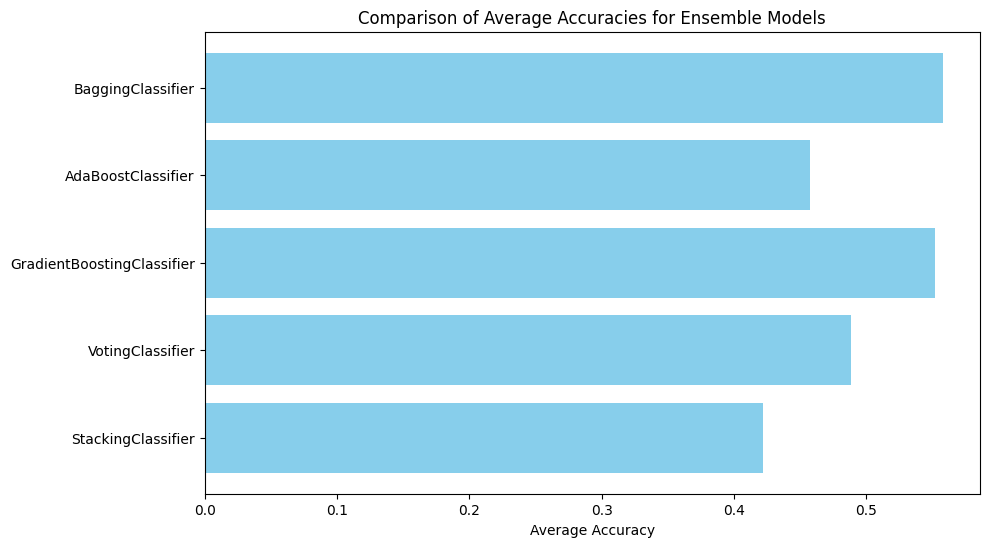

In [ ]:
import matplotlib.pyplot as plt
clf_names = [clf.__class__.__name__ for clf in classifiers]
plt.figure(figsize=(10, 6))
plt.barh(clf_names, average_accuracies, color='skyblue')
plt.xlabel('Average Accuracy')
plt.title('Comparison of Average Accuracies for Ensemble Models')
plt.gca().invert_yaxis()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


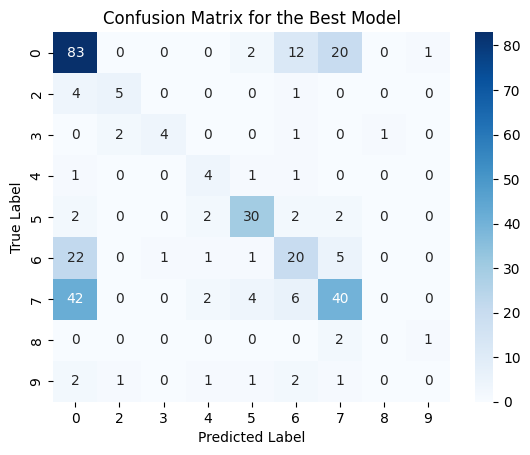

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(pred, tar, test_size=0.3, random_state=0)
best_model = bagging_dt
best_model.fit(X_train, y_train)
cm = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=np.unique(tar), yticklabels=np.unique(tar))
plt.title('Confusion Matrix for the Best Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()